In [99]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [100]:
def read_HSI(dataset):
    if dataset == 'Salinas':
        X = loadmat('Datasets/Salinas/Salinas_corrected.mat')['salinas_corrected']
        y = loadmat('Datasets/Salinas/Salinas_gt.mat')['salinas_gt']
        print(f"X shape: {X.shape}\ny shape: {y.shape}")
        return X, y
    elif dataset == 'Indian Pines':
        X = loadmat('Datasets/Indian Pines/Indian_pines_corrected.mat')['indian_pines_corrected']
        y = loadmat('Datasets/Indian Pines/Indian_pines_gt.mat')['indian_pines_gt']
        print(f"X shape: {X.shape}\ny shape: {y.shape}")
        return X, y
# dataset_name = 'Indian Pines'
dataset_name = 'Salinas'
X, y = read_HSI(dataset=dataset_name)

X shape: (512, 217, 204)
y shape: (512, 217)


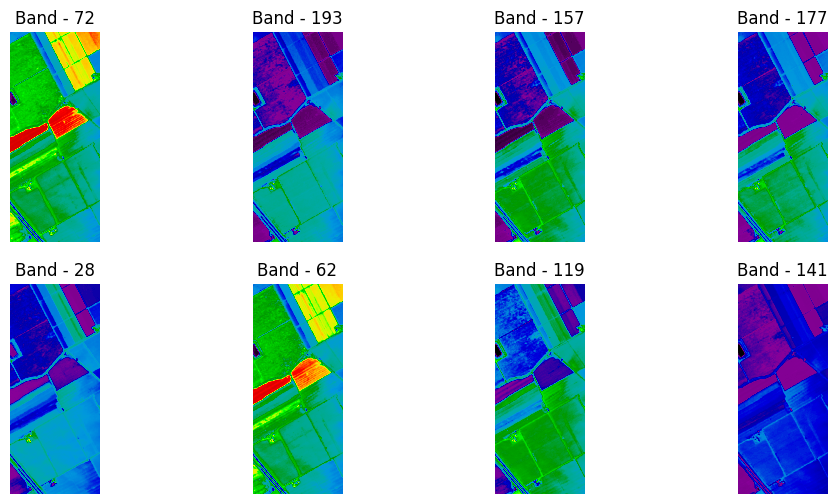

In [101]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 8+1):
    fig.add_subplot(2,4, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

In [102]:
# Visualizing the Ground truth of the HSI
cls = px.imshow(y, color_continuous_scale='inferno',)

cls.update_layout(title = 'Ground Truth', coloraxis_showscale=True)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()
# py.plot(cls, filename = 'ground_truth', auto_open=True)

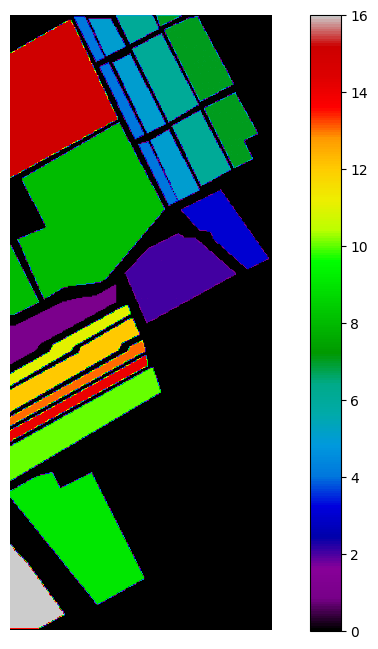

In [103]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

In [104]:
def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X, y)
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band196,band197,band198,band199,band200,band201,band202,band203,band204,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111104 entries, 0 to 111103
Columns: 205 entries, band1 to class
dtypes: int16(204), uint8(1)
memory usage: 43.3 MB


In [106]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204
count,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,...,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000
mean,372.181929,480.388321,693.751287,1156.562923,1462.129950,1533.406025,1473.193944,1634.795552,1866.721801,1930.824417,...,132.158959,116.093219,138.739181,117.048180,71.937059,104.474825,71.262025,39.304778,14.063463,22.294175
std,62.453906,80.614130,103.217542,170.676450,227.876068,260.417860,271.714302,329.998481,404.351771,445.485781,...,71.227778,63.216203,76.108928,65.012702,40.255958,59.222728,41.232828,23.280864,9.088472,13.735217
min,87.000000,86.000000,90.000000,86.000000,91.000000,91.000000,88.000000,88.000000,87.000000,86.000000,...,-3.000000,-6.000000,-2.000000,-7.000000,-5.000000,-3.000000,-6.000000,-9.000000,-8.000000,-11.000000
25%,308.000000,404.000000,604.000000,1005.000000,1260.000000,1305.000000,1240.000000,1348.000000,1514.000000,1540.000000,...,64.000000,55.000000,65.000000,55.000000,33.000000,47.000000,32.000000,18.000000,7.000000,10.000000
50%,372.000000,482.000000,721.000000,1174.000000,1496.000000,1560.000000,1512.000000,1691.000000,1936.000000,2007.000000,...,143.000000,126.000000,150.000000,127.000000,78.000000,113.000000,76.000000,42.000000,15.000000,23.000000
75%,435.000000,558.000000,745.000000,1267.000000,1617.000000,1715.000000,1664.000000,1873.000000,2157.000000,2255.000000,...,197.000000,174.000000,209.000000,177.000000,109.000000,159.000000,108.000000,60.000000,21.000000,33.000000
max,814.000000,1165.000000,1920.000000,3865.000000,5153.000000,5614.000000,5663.000000,6599.000000,7748.000000,8209.000000,...,569.000000,504.000000,608.000000,523.000000,596.000000,693.000000,745.000000,765.000000,777.000000,775.000000


# PCA

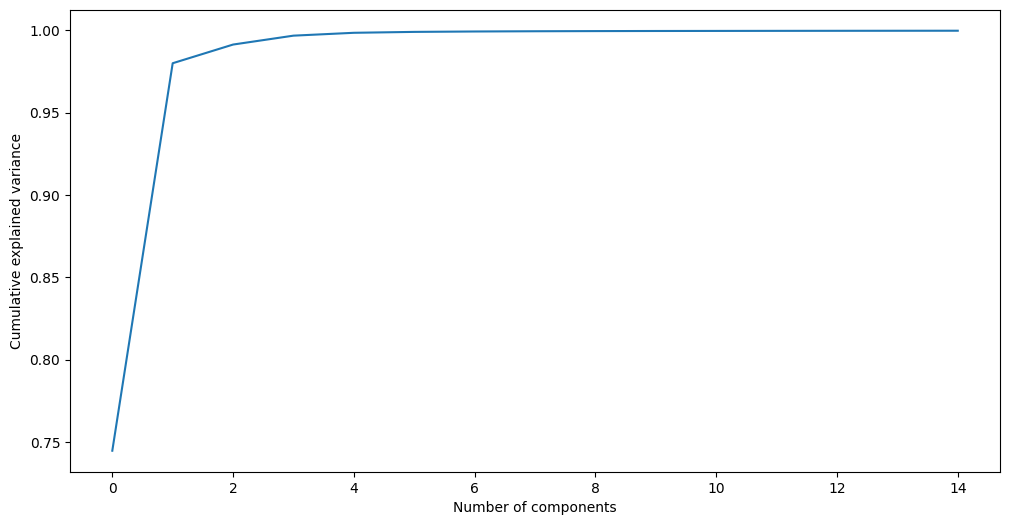

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 15)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


Select 8 as the no.of components for PCA

In [108]:
pca = PCA(n_components = 8)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)]+['class']

q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,-6136.415770,-4385.651601,628.426690,-302.089387,-7.164320,48.222012,-129.801973,-28.045863,0
1,-6196.986718,-4360.590266,568.289463,-269.925094,-1.914969,-13.422141,-141.516132,-48.425748,0
2,-6359.538817,-4693.892811,578.047775,-286.413937,18.366365,-17.493501,-122.449201,-23.107802,0
3,-6583.700658,-5103.974489,630.466845,-313.787607,39.673922,-9.386642,-130.574810,-14.943105,0
4,-6834.644650,-5385.604040,666.876042,-327.332038,24.787586,-19.604360,-134.531359,-30.850478,0


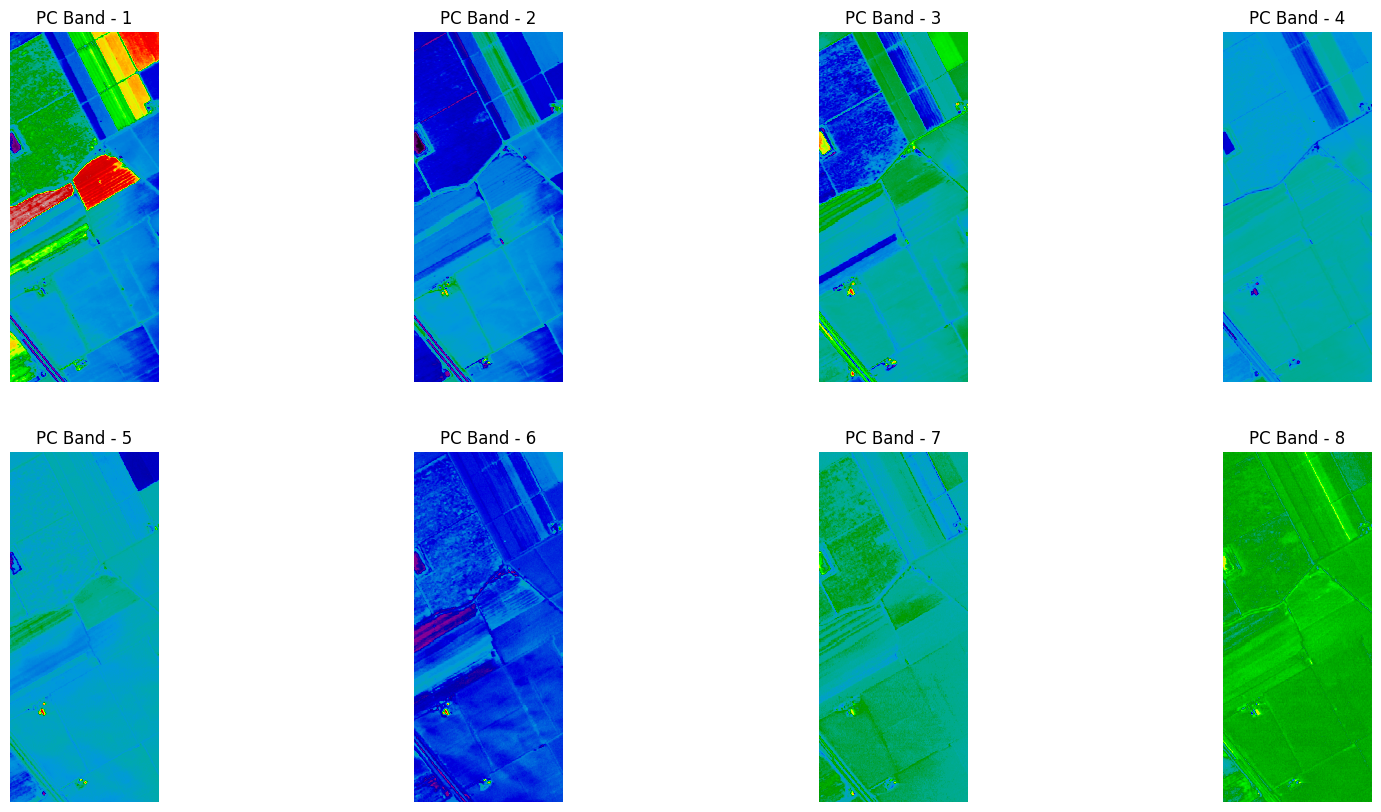

In [109]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(y.shape[0], y.shape[1]), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'PC Band - {i}')

In [110]:
# saving to .csv
q.to_csv(f'Datasets/{dataset_name}/{dataset_name}_PCA.csv', index=False)

# FastICA

In [111]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=8,
         random_state=0,
         whiten='unit-variance')
dt = fast_ica.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)]+['class']

q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,1.335208,-0.142253,0.755461,-0.100093,1.039744,-0.260446,1.028922,0.033928,0
1,1.393530,-0.434703,0.631693,-0.048043,1.045360,-0.004241,1.057971,0.159134,0
2,1.319765,-0.334693,0.625405,0.069177,1.055289,-0.036243,1.064955,-0.135156,0
3,1.410656,-0.261351,0.638957,0.122732,1.121327,-0.097339,1.166500,-0.202448,0
4,1.462530,-0.410069,0.656864,0.035838,1.202083,-0.070394,1.224814,-0.143898,0


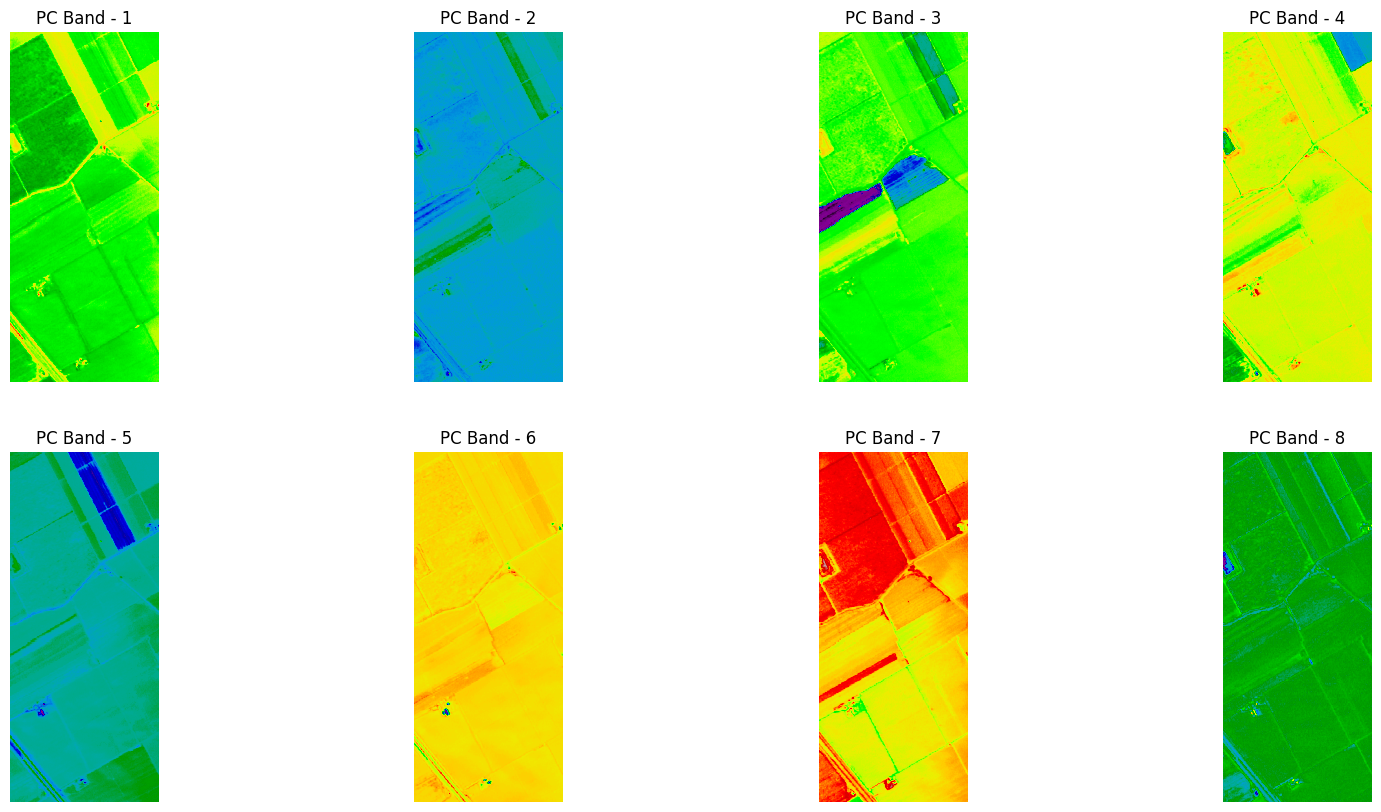

In [112]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(y.shape[0], y.shape[1]), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'PC Band - {i}')

In [113]:
# saving to .csv
q.to_csv(f'Datasets/{dataset_name}/{dataset_name}_FastICA.csv', index=False)